**Importing Libraries**

In [144]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings ('ignore')
from scipy.stats import ttest_rel, wilcoxon

In [146]:
#loading the dataset
df=pd.read_csv('Mark Ads Data.csv')

**Exploratory Data Analysis**

In [148]:
#data overview
df.head()

,Date,Day_of_Week,Month,Facebook_Views,Facebook_Clicks,Facebook_Conversions,Facebook_Cost,Facebook_CTR,Facebook_Conversion_Rate,Facebook_CPC,...,Google Ads_Clicks,Google Ads_Conversions,Google Ads_Cost,Google Ads_CTR,Google Ads_Conversion_Rate,Google Ads_CPC,Total_Views,Total_Clicks,Total_Conversions,Total_Cost
0,1/1/2024,Monday,1,2860,240,31,59.51,0.0839,0.1292,0.25,...,186,43,213.56,0.0591,0.2312,1.15,6005,426,74,273.07
1,1/2/2024,Tuesday,1,7390,262,6,198.49,0.0355,0.0229,0.76,...,356,149,100.12,0.0482,0.4185,0.28,14778,618,155,298.61
2,1/3/2024,Wednesday,1,7226,209,9,98.35,0.0289,0.0431,0.47,...,247,92,149.68,0.0720,0.3725,0.61,10657,456,101,248.03
3,1/4/2024,Thursday,1,7191,264,33,171.48,0.0367,0.1250,0.65,...,73,21,222.77,0.0197,0.2877,3.05,10895,337,54,394.25
4,1/5/2024,Friday,1,5772,210,41,88.20,0.0364,0.1952,0.42,...,71,16,145.25,0.0126,0.2254,2.05,11404,281,57,233.45


In [149]:
#datset count of rows and columns
df.shape

(366, 21)

In [264]:
# column data types
df.dtypes

Date                            datetime64[ns]
Day_of_Week                             object
Month                                   object
Facebook_Views                           int64
Facebook_Clicks                          int64
Facebook_Conversions                     int64
Facebook_Cost                          float64
Facebook_CTR                           float64
Facebook_Conversion_Rate               float64
Facebook_CPC                           float64
Google Ads_Views                         int64
Google Ads_Clicks                        int64
Google Ads_Conversions                   int64
Google Ads_Cost                        float64
Google Ads_CTR                         float64
Google Ads_Conversion_Rate             float64
Google Ads_CPC                         float64
Total_Views                              int64
Total_Clicks                             int64
Total_Conversions                        int64
Total_Cost                             float64
Facebook Conv

In [262]:
df['Month'] = df['Month'].astype('object')


In [153]:
#descriptive stats of campaigns
df.describe()

,Facebook_Views,Facebook_Clicks,Facebook_Conversions,Facebook_Cost,Facebook_CTR,Facebook_Conversion_Rate,Facebook_CPC,Google Ads_Views,Google Ads_Clicks,Google Ads_Conversions,Google Ads_Cost,Google Ads_CTR,Google Ads_Conversion_Rate,Google Ads_CPC,Total_Views,Total_Clicks,Total_Conversions,Total_Cost
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,5112.797814,177.931694,26.131148,125.033716,0.039634,0.185497,0.887322,5826.554645,234.661202,82.508197,164.903661,0.044131,0.350455,0.898770,10939.352459,412.592896,108.639344,289.937377
std,1736.913099,72.301789,13.039635,43.563200,0.023019,0.150728,0.596603,1743.923060,99.562000,42.400293,48.845576,0.023618,0.087007,0.608915,2476.941631,124.194659,44.988839,66.687405
min,2016.000000,50.000000,5.000000,50.690000,0.007700,0.017400,0.170000,3001.000000,60.000000,15.000000,80.940000,0.007200,0.201300,0.230000,5859.000000,110.000000,26.000000,140.100000
25%,3651.750000,116.000000,15.000000,86.560000,0.023025,0.086775,0.460000,4270.000000,152.000000,48.250000,123.700000,0.025600,0.273050,0.520000,9086.500000,322.250000,75.000000,239.157500
50%,5136.000000,178.500000,26.000000,125.370000,0.033800,0.145650,0.700000,5736.500000,225.000000,75.000000,165.980000,0.041250,0.354600,0.690000,10862.000000,414.500000,103.000000,290.805000
75%,6654.000000,238.000000,37.000000,162.402500,0.050800,0.236325,1.117500,7318.500000,329.750000,109.000000,208.060000,0.056600,0.425550,1.107500,12790.000000,503.750000,139.750000,337.622500
max,7991.000000,299.000000,49.000000,199.690000,0.133900,0.839300,3.260000,8985.000000,399.000000,192.000000,249.220000,0.119900,0.500000,4.020000,16603.000000,679.000000,233.000000,439.220000


**Comparing Campaign performance**

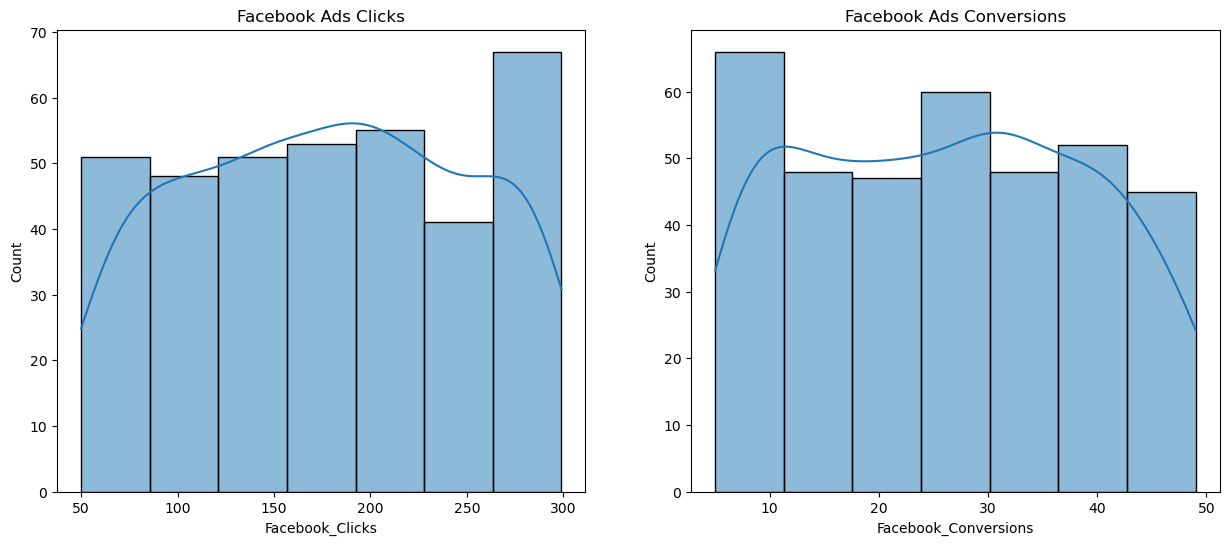

In [155]:
# distribution of the Facebook clicks and conversions
plt.figure(figsize=(15,6))             
plt.subplot(1,2,1)                     
plt.title('Facebook Ads Clicks')         
sns.histplot(df['Facebook_Clicks'], bins=7, edgecolor='k', kde=True) 
plt.subplot(1,2,2)                     
plt.title('Facebook Ads Conversions')         
sns.histplot(df['Facebook_Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()

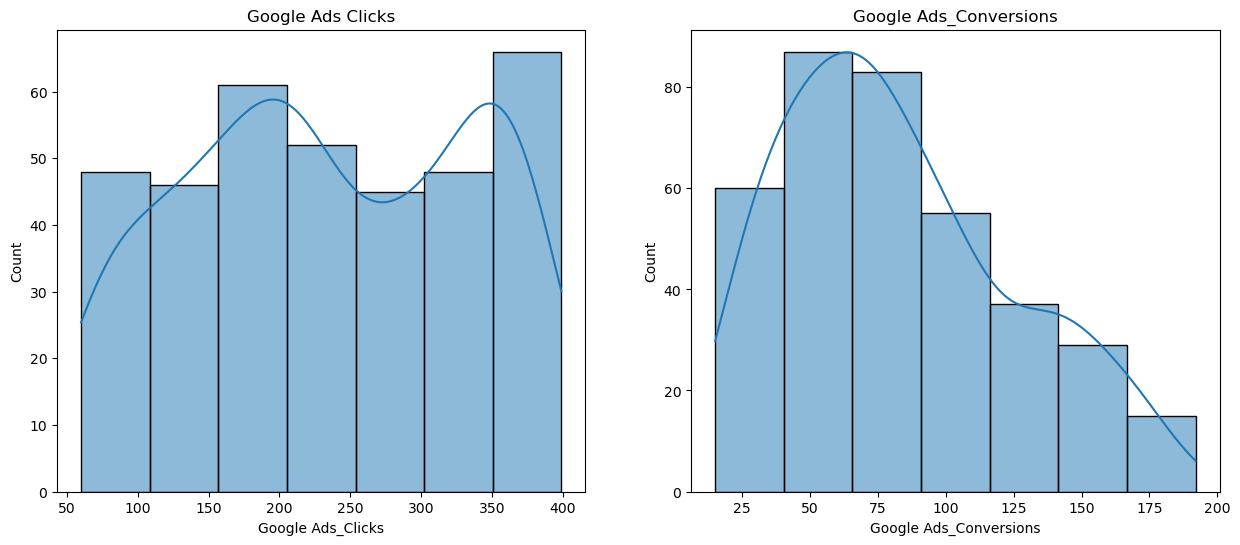

In [156]:
# distribution of the Google clicks and conversions
plt.figure(figsize=(15,6))             
plt.subplot(1,2,1)                     
plt.title('Google Ads Clicks')         
sns.histplot(df['Google Ads_Clicks'], bins=7, edgecolor='k', kde=True) 
plt.subplot(1,2,2)                     
plt.title('Google Ads_Conversions')         
sns.histplot(df['Google Ads_Conversions'], bins=7, edgecolor='k', kde=True)
plt.show()


- Facebook ads received between 50–300 clicks most days, leading to around 5–50 conversions. This shows steady interest but fewer actions taken.
- Google ads had higher activity, with clicks ranging from 50–400 and conversions between 25–200, meaning some days performed extremely well.
- Facebook’s results were more consistent, but yielded conversions lesser than 50.
- Google performs more than Facebook in clicks and mostly covversions.
- Facebook built awareness, Google delivered conversions.

**How frequently do we observe days of a high number of conversions compared to days with a low number of conversions?**

In [159]:
#creating category for conversions
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 15:
            category.append('less than 15')
        elif 16 <= conversion < 31:
            category.append('16 - 30')
        elif 31 <= conversion < 46:
            category.append('31 - 45')
        elif 46 <= conversion < 61:
            category.append('46 - 60')
        elif 61 <= conversion < 81:
            category.append('61 - 80')
        else:
            category.append('more than 80')
    return category

df['Facebook Conversion Category'] = create_conversion_category('Facebook_Conversions')
df['Google Conversion Category'] = create_conversion_category('Google Ads_Conversions')

In [160]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
16 - 30         121
31 - 45         118
less than 15     90
46 - 60          27
more than 80     10
Name: count, dtype: int64

In [161]:
#Fb Category and its count
pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index()

,Facebook Conversion Category,count
0,16 - 30,121
1,31 - 45,118
2,less than 15,90
3,46 - 60,27
4,more than 80,10


In [162]:
Facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns={'Facebook Conversion Category':'Category'})
Facebook

,Category,count
0,16 - 30,121
1,31 - 45,118
2,less than 15,90
3,46 - 60,27
4,more than 80,10


In [163]:
#Google Category and its count
pd.DataFrame(df['Google Conversion Category'].value_counts()).reset_index()

,Google Conversion Category,count
0,more than 80,168
1,61 - 80,69
2,46 - 60,52
3,31 - 45,45
4,16 - 30,32


In [164]:
df['Google Conversion Category'].value_counts()

Google Conversion Category
more than 80    168
61 - 80          69
46 - 60          52
31 - 45          45
16 - 30          32
Name: count, dtype: int64

In [165]:
Google = pd.DataFrame(df['Google Conversion Category'].value_counts()).reset_index().rename(columns={'Google Conversion Category':'Category'})
Google

,Category,count
0,more than 80,168
1,61 - 80,69
2,46 - 60,52
3,31 - 45,45
4,16 - 30,32


In [166]:
#merging Fb and Google category tables
category_df=pd.merge(Facebook,Google, on='Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,16 - 30,121.0,32.0
1,31 - 45,118.0,45.0
2,46 - 60,27.0,52.0
3,61 - 80,0.0,69.0
4,less than 15,90.0,0.0
5,more than 80,10.0,168.0


In [167]:
#rearranging the categories in order
category_df=category_df.iloc[[4,0,1,2,3,5]]
category_df

,Category,count_x,count_y
4,less than 15,90.0,0.0
0,16 - 30,121.0,32.0
1,31 - 45,118.0,45.0
2,46 - 60,27.0,52.0
3,61 - 80,0.0,69.0
5,more than 80,10.0,168.0


In [168]:
#data overview of the new categories
df[['Facebook_Conversions','Facebook Conversion Category', 'Google Ads_Conversions','Google Conversion Category']].head(100)

,Facebook_Conversions,Facebook Conversion Category,Google Ads_Conversions,Google Conversion Category
0,31,31 - 45,43,31 - 45
1,6,less than 15,149,more than 80
2,9,less than 15,92,more than 80
3,33,31 - 45,21,16 - 30
4,41,31 - 45,16,16 - 30
...,...,...,...,...
95,39,31 - 45,138,more than 80
96,10,less than 15,149,more than 80
97,22,16 - 30,17,16 - 30
98,9,less than 15,89,more than 80


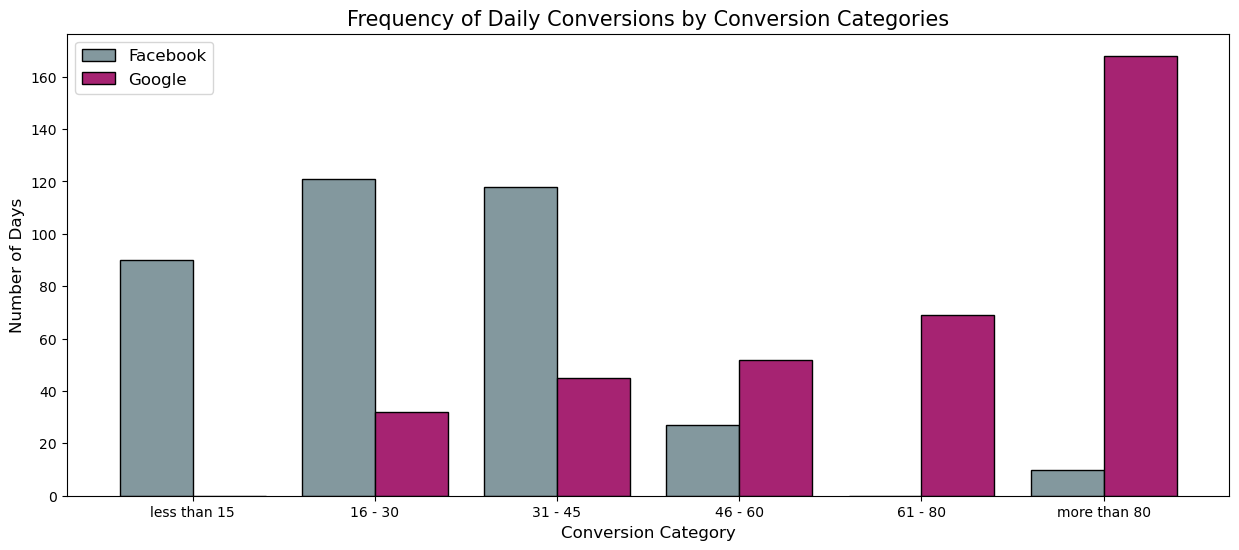

In [169]:
 

# Create X-axis positions (one for each category)
X_axis = np.arange(len(category_df))

# Set figure size
plt.figure(figsize=(15,6))

# Plot Facebook bars
plt.bar(X_axis - 0.2, category_df["count_x"], 0.4, 
        label='Facebook', color="#83989E", linewidth=1, edgecolor='k')

# Plot Google bars
plt.bar(X_axis + 0.2, category_df["count_y"], 0.4, 
        label='Google', color="#A62372", linewidth=1, edgecolor='k')

# Add x-axis labels with category names
plt.xticks(X_axis, category_df["Category"])

# Axis labels and title
plt.xlabel("Conversion Category", fontsize=12)
plt.ylabel("Number of Days", fontsize=12)
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize=15)

# Show legend
plt.legend(fontsize=12)

# Display the chart
plt.show()


The chart shows that Facebook recorded a higher frequency of low-to-moderate conversion days, with most days (around 90–120 days) falling between “less than 15” and “31–45” conversions. Only a few days (less than 10) has high conversions.
In contrast, Google had fewer low-conversion days but a much higher frequency of high-conversion days(over 160 days recorded more than 80 conversions).

Overall, Facebook’s conversions were frequent but smaller, while Google’s conversions were less frequent but more concentrated on very high-performance days.
This means Google tends to deliver spikes of strong results, whereas Facebook maintains steadier but lower daily performance.

**Do more clicks on ads really lead to more sales?**

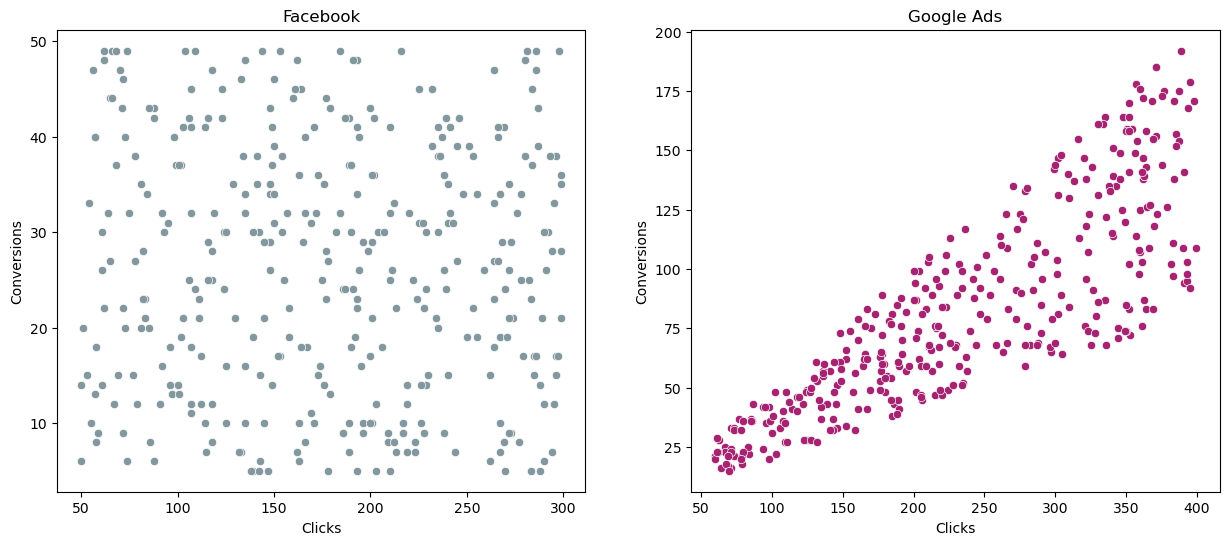

In [172]:
#correlation between clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('Facebook')
sns.scatterplot(x = df ['Facebook_Clicks'],y=df ['Facebook_Conversions'], color = '#83989E')
plt.xlabel('Clicks')
plt.ylabel("Conversions")  
plt.subplot(1,2,2)
plt.title('Google Ads')
sns.scatterplot(x=df ['Google Ads_Clicks'],y=df ['Google Ads_Conversions'], color = '#A62372')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

In [173]:
#calculating fb correlation coefficient
facebook_corr = df [['Facebook_Conversions', 'Facebook_Clicks']].corr()
facebook_corr


,Facebook_Conversions,Facebook_Clicks
Facebook_Conversions,1.000000,-0.040735
Facebook_Clicks,-0.040735,1.000000


In [174]:
Google_corr = df[['Google Ads_Conversions', 'Google Ads_Clicks']].corr()
Google_corr

,Google Ads_Conversions,Google Ads_Clicks
Google Ads_Conversions,1.000000,0.843657
Google Ads_Clicks,0.843657,1.000000


The relationship between clicks and conversions is very different for the two platforms:

•	Facebook Ads:
The scatter plot shows no clear pattern. Conversions remain scattered regardless of the number of clicks.
The correlation coefficient is -0.04, meaning there is virtually no relationship between the number of clicks and conversions.
 More clicks on Facebook ads do not necessarily lead to more sales.  
•	Google Ads:
The data shows a strong upward trend. As clicks increase, conversions also rise noticeably. The correlation coefficient is 0.84,
indicating a very strong positive relationship between clicks and conversions.
The strong correlation between clicks on Google ads and sales suggests that Google advertising is highly effective in driving sales 
for the business. Increasing investment in Google ads or optimizing their performance could potentially lead to even higher sales.


**Hypothesis Testing**

Null Hypothesis (H₀): There is no difference or Facebook performs equally or better than Google.
                       
Alternative Hypothesis (H₁): Google produces more conversions than Facebook.

In [177]:
 
Google = df['Google Ads_Conversions']
Facebook = df['Facebook_Conversions']

# Paired t-test
t_stat, p_value = ttest_rel(Google, Facebook, alternative='greater')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("p-value is less than 0.05, Reject the null hypothesis")
else:
    print("p-value is greater than 0.05, Accept the null hypothesis")

 


 

T-statistic: 24.668345689839626, P-value: 4.631356003731928e-80
p-value is less than 0.05, Reject the null hypothesis


In [178]:

 
google = df['Google Ads_Conversions']
facebook = df['Facebook_Conversions']

# Calculate mean conversions for both platforms
mean_google = google.mean()
mean_facebook = facebook.mean()

# Display results
print("Mean Conversions")
print(f"Google Ads: {mean_google:.2f}")
print(f"Facebook Ads: {mean_facebook:.2f}")

print("Paired T-Test Results")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("p-value is less than 0.05, Reject the null hypothesis")
else:
    print("p-value is greater than 0.05, Accept the null hypothesis")


Mean Conversions
Google Ads: 82.51
Facebook Ads: 26.13
Paired T-Test Results
T-statistic: 24.668
P-value: 0.0000
p-value is less than 0.05, Reject the null hypothesis


The mean number of conversions from Google ads (82.51) is substantially higher than the mean number of conversions from Facebook ads (26.13). This suggests that, on average, Google advertising is more effective in generating conversions compared to Facebook advertising.
The p-value ( 0.0000) indicates strong evidence against the null hypothesis.

The results strongly support the alternate hypothesis, indicating that the number of conversions from Google advertising is indeed greater than the number of conversions from Facebook advertising.

Google advertising appears to be a more effective channel for generating conversions compared to Facebook advertising, based on the sample data analyzed.

Given the significant difference in conversion rates between Google and Facebook, consider reallocating resources towards Google advertising efforts. This could involve increasing ad spend, expanding targeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.


**What will happen when I go with the Google Ads? How many Google Ads conversions can I expect given a certain number of Google Ads clicks?**

In [181]:
# Independent variable
x = df[['Google Ads_Clicks']]
# Dependent variable
y = df[['Google Ads_Conversions']]

#initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(x, y)
prediction = reg_model.predict(x)

# Model evaluation
r2 = r2_score(y, prediction) * 100
mse = mean_squared_error(y, prediction)

print('Accuracy (R2 Score):', round(r2, 2),'%')
print('Mean Squared Error:', round(mse, 2))

Accuracy (R2 Score): 71.18 %
Mean Squared Error: 516.78


Regression model explains about 71% (R² = 0.71) of the variation in conversions using clicks. 

It is fairly accurate at predicting how many conversions you can expect as clicks increase.

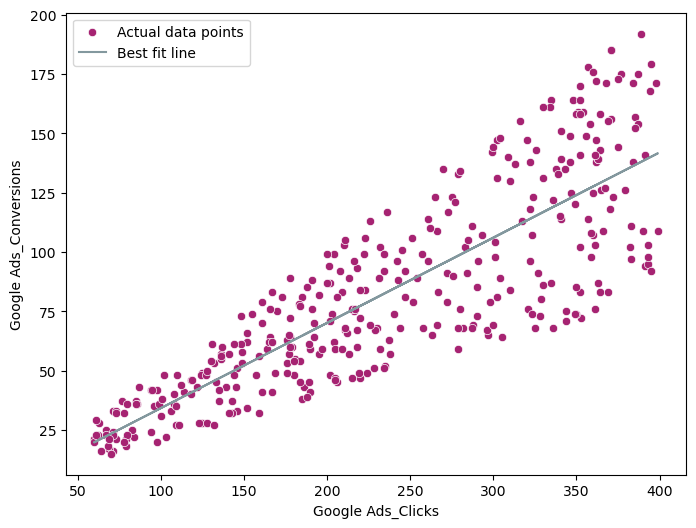

In [184]:
#showing scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Google Ads_Clicks'], y=df[ 'Google Ads_Conversions'], color='#A62372', label='Actual data points')
plt.plot(df['Google Ads_Clicks'], prediction, color='#83989E', label= 'Best fit line')
plt.legend()
plt.show()

In [185]:
#predictiion
print(f'For 100 clicks, Expected Conversion: {round(reg_model.predict([[100]])[0][0], 2)}')
print(f'For 250 clicks, Expected Conversion: {round(reg_model.predict([[250]])[0][0], 2)}')

For 100 clicks, Expected Conversion: 34.13
For 250 clicks, Expected Conversion: 88.02


This shows a clear upward trend. More clicks on Google Ads generally lead to more conversions.

When Google Ads receives 100 clicks, you can expect around 34 conversions.

When clicks increase to 250, conversions are expected to rise to 88.
 

**Which platform is more cost-effective**

Average Cost per Conversion by Platform:
     Platform  Avg_Cost_Per_Conversion
1  Google Ads                 2.730869
0    Facebook                 7.247477

 Most cost-effective platform: Google Ads


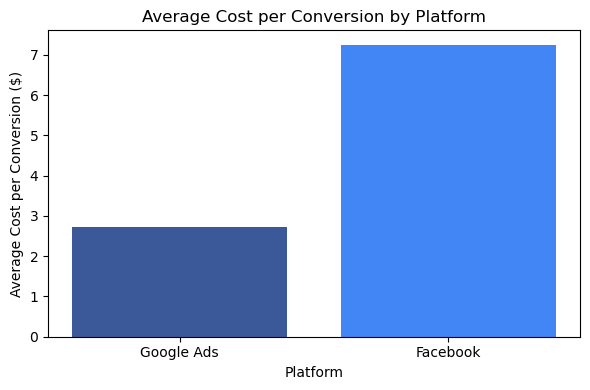

In [278]:
#calculate CPC for each platform  
df['Facebook_Cost_Per_Conversion'] = df['Facebook_Cost'] / df['Facebook_Conversions']
df['Google_Cost_Per_Conversion'] = df['Google Ads_Cost'] / df['Google Ads_Conversions']

#compute average CPC
avg_cost_effectiveness = {'Facebook': df['Facebook_Cost_Per_Conversion'].mean(),'Google Ads': df['Google_Cost_Per_Conversion'].mean()}

# convert to DataFrame for easy comparison
cost_df = pd.DataFrame(list(avg_cost_effectiveness.items()), columns=['Platform', 'Avg_Cost_Per_Conversion'])
cost_df = cost_df.sort_values(by='Avg_Cost_Per_Conversion')

#determine which platform is more cost-effective
most_cost_effective = cost_df.iloc[0]

print("Average Cost per Conversion by Platform:")
print(cost_df)
print("\n Most cost-effective platform:", most_cost_effective['Platform'])

 
plt.figure(figsize=(6, 4))
plt.bar(cost_df['Platform'], cost_df['Avg_Cost_Per_Conversion'], color=['#3b5998', '#4285F4'])
plt.title('Average Cost per Conversion by Platform')
plt.ylabel('Average Cost per Conversion ($)')
plt.xlabel('Platform')
plt.tight_layout()
plt.show()


Average CPC for Google Ads is lesser than Average CPC for Facebook. Hypothesis testing will be carried for further analysis to ascertain that  Google Ads really has a lesser CPC to Facebook Ad.

**Hypothesis Testing** 

Null Hypothesis (H₀):
Google Ads’ CPC is greater than or equal to Facebook’s CPC.
 
Alternative Hypothesis (H₁):
Google Ads’ CPC is less than Facebook’s CPC.

In [288]:
# compare mean CPC
df['Facebook_Cost_per_Conversion'] = df['Facebook_Cost'] / df['Facebook_Conversions']
df['Google_Cost_per_Conversion'] = df['Google Ads_Cost'] / df['Google Ads_Conversions']

from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(df['Facebook_Cost_per_Conversion'], df['Google_Cost_per_Conversion'])

print("T-statistic:", t_stat)
print("P-value:", p_value)
print("Mean Facebook CPC:", df['Facebook_Cost_per_Conversion'].mean())
print("Mean Google CPC:", df['Google_Cost_per_Conversion'].mean())

# Interpretation
if p_value < 0.05:
    print("p-value is less than 0.05, Reject the null hypothesis")
else:
    print("p-value is greater than 0.05, Accept the null hypothesis")


T-statistic: 12.53509011099898
P-value: 3.1814508977564416e-30
Mean Facebook CPC: 7.2474774045058785
Mean Google CPC: 2.7308693189235775
p-value is less than 0.05, Reject the null hypothesis


The mean number of CPC from Facebook ads (7.24) is substantially higher than the mean number of CPC from Google ads (2.73). This suggests that, on average, Google advertising is more cost-effective in generating conversions compared to Facebook advertising. 
The p-value ( 0.0000) indicates strong evidence against the null hypothesis.

The results strongly support the alternate hypothesis, indicating that the Google CPC is less than the Facebook CPC

Google advertising appears to be a more cost-effective channel for generating conversions compared to Facebook advertising, based on the sample data analyzed.

**Analyzing campaign metrics over time**

**At what times of the month or days of the week do we experience conversions?**

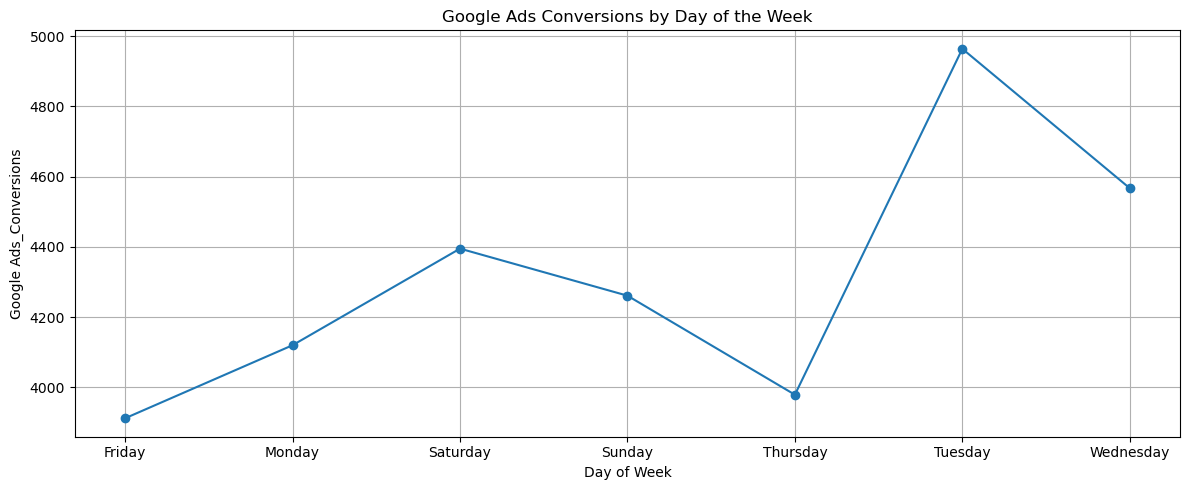

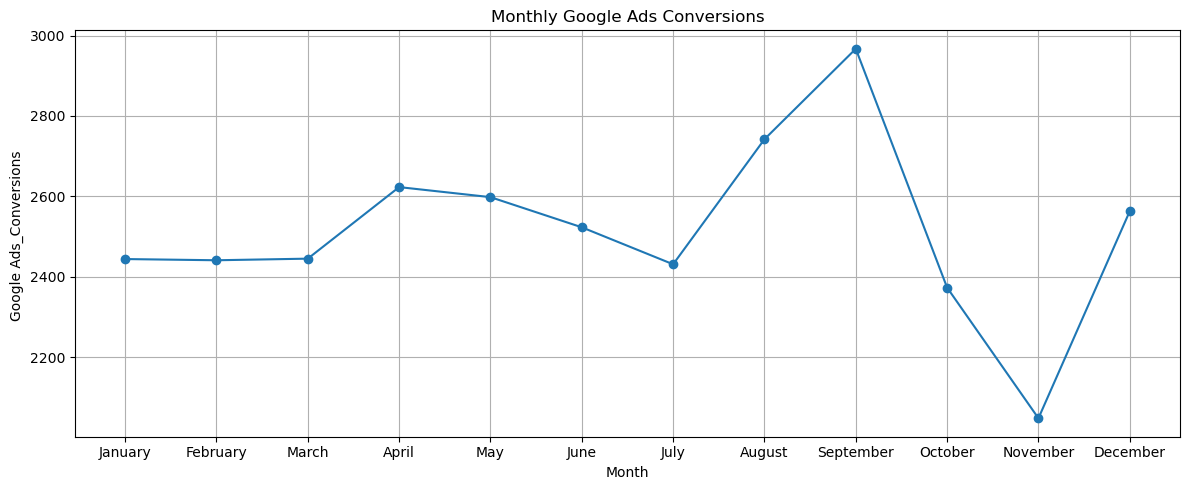

In [272]:
 #correct date format
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

#categorical order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
#trend 1
plt.figure(figsize=(12, 5))
plt.plot(day_conversion['Day_of_Week'], day_conversion['Google Ads_Conversions'],marker='o', label='Google Ads')
plt.title('Google Ads Conversions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Google Ads_Conversions')
plt.grid(True)
plt.tight_layout()
plt.show()

#Google Ads Conversions by Month
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)
monthly_conversion = df.groupby('Month')['Google Ads_Conversions'].sum().reset_index()

#trend 2
plt.figure(figsize=(12, 5))
plt.plot(monthly_conversion['Month'], monthly_conversion['Google Ads_Conversions'], marker='o')
plt.title('Monthly Google Ads Conversions')
plt.xlabel('Month')
plt.ylabel('Google Ads_Conversions ')
plt.grid(True)
plt.tight_layout()
plt.show()


Day-of-the-Week Trends:

•	Conversions peak on Tuesdays, suggesting strong engagement early in the week, likely when campaigns and audiences are most active.

•	There is a gradual decline from Wednesday to Friday, with Friday recording the lowest weekday conversions.

•	Conversions pick up again during the weekend (Saturday and Sunday), showing renewed interest,possibly from leisure-time browsing or weekend offers.

Audience engagement is strongest early in the week (Tuesday) and again on weekends, indicating these are prime days to schedule campaigns 
or allocate higher budgets.


Month-by-Month Trends:

• Conversions remain relatively stable from January to June, showing consistent campaign performance in the first half of the year.

• A notable surge occurs in August and September, reaching the highest conversion levels, possibly driven by seasonal promotions or 
back-to-school marketing periods.

• Conversions dip in October and November, then rebound slightly in December, which may reflect changing ad strategies or audience 
fatigue before year-end campaigns.

Late summer to early fall (August–September) delivers the strongest conversion performance, suggesting this period has the best di iveness.ss.



**How does CPC trend over time?**

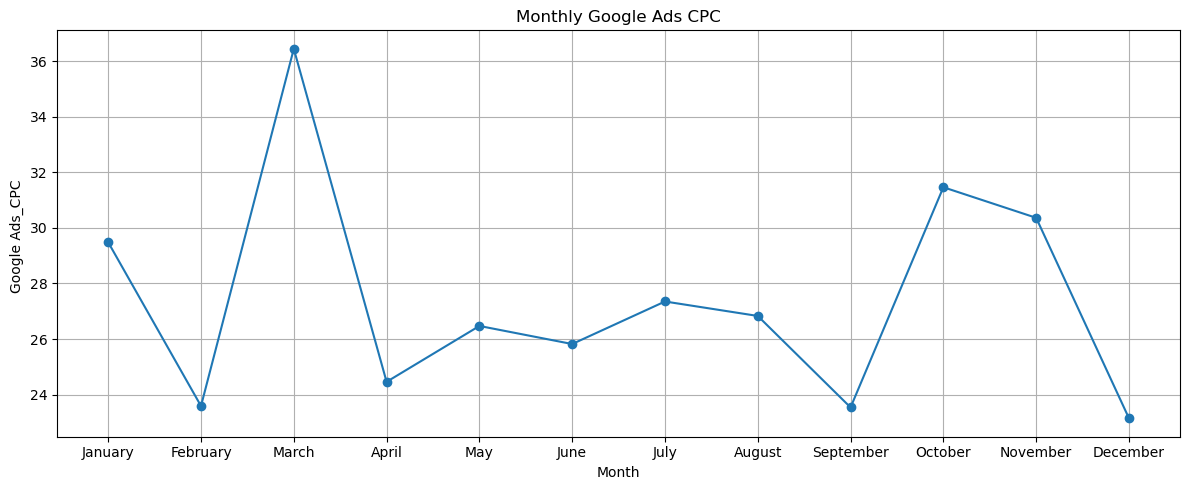

In [266]:
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)
monthly_CPC = df.groupby('Month')['Google Ads_CPC'].sum().reset_index()

#CPC monthly trend
plt.figure(figsize=(12, 5))
plt.plot(monthly_CPC['Month'], monthly_CPC['Google Ads_CPC'], marker='o')
plt.title('Monthly Google Ads CPC')
plt.xlabel('Month')
plt.ylabel('Google Ads_CPC ')
plt.grid(True)
plt.tight_layout()
plt.show()

- March records the highest CPC, suggesting a period of intense competition, likely due to seasonal campaigns or increased ad 
spending early in the year.

- After March, CPC stabilizes between April and August, indicating a relatively consistent and efficient ad performance period.

- A sharp dip in September points to reduced competition, which may present an opportunity for cost-efficient ad placements.

- CPC rises again in October and November, aligning with Q4 marketing pushes (e.g., holiday promotions and end-of-year sales).

- December sees another decline, possibly as campaigns wind down and budgets are exhausted.

 
CPC trends suggest cyclical ad competition, peaking in March and Q4, with lower-cost opportunities in September and December for
advertisers seeking to maximize ROI.

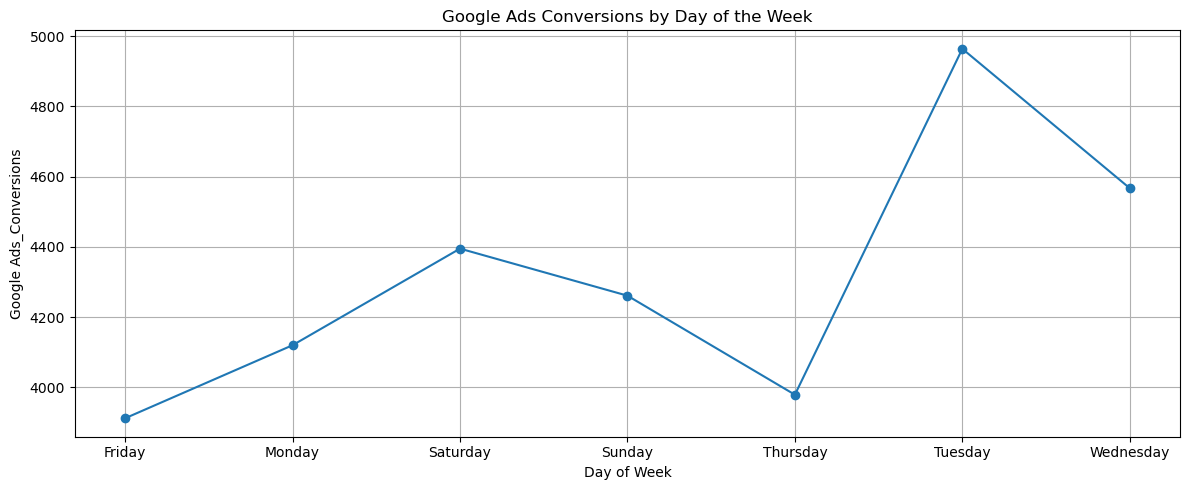

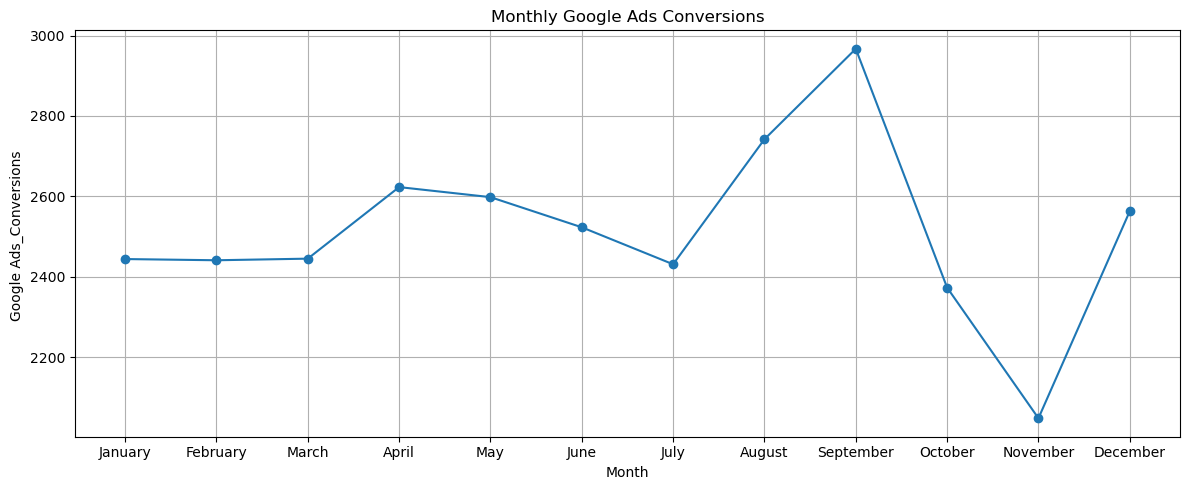

In [270]:
#correct date format
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

#categorical order
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
#trend 1
plt.figure(figsize=(12, 5))
plt.plot(day_conversion['Day_of_Week'], day_conversion['Google Ads_Conversions'],marker='o', label='Google Ads')
plt.title('Google Ads Conversions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Google Ads_Conversions')
plt.grid(True)
plt.tight_layout()
plt.show()

#Google Ads Conversions by Month
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)
monthly_conversion = df.groupby('Month')['Google Ads_Conversions'].sum().reset_index()

#trend 2
plt.figure(figsize=(12, 5))
plt.plot(monthly_conversion['Month'], monthly_conversion['Google Ads_Conversions'], marker='o')
plt.title('Monthly Google Ads Conversions')
plt.xlabel('Month')
plt.ylabel('Google Ads_Conversions ')
plt.grid(True)
plt.tight_layout()
plt.show()